# **Nama : I GUSTI DE AYU**

# **IMPORT DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARY

In [ ]:
import pandas as pd #dataframe
import numpy as np
import seaborn as sns #visualisasi
import matplotlib.pyplot as plt #visualisasi
from sklearn.preprocessing import LabelEncoder #encoding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/06. Rakamin /loan_data_2007_2014.csv")
df.head()

<ipython-input-4-8a3ff7865046>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/06. Rakamin /loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **EDA (Exploratory Data Analysis)**

In [ ]:
df.shape

(466285, 75)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

melihat distribusi data

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


CEK "NaN"

In [ ]:
# Mengecek apakah ada NaN dalam DataFrame
has_nan = df.isna().any().any()
print("Apakah terdapat nilai NaN dalam data?:", has_nan)
total_nan_per_column = df.isna().sum()
columns_with_nan = total_nan_per_column[total_nan_per_column > 0]
print("Kolom dengan nilai NaN:\n", columns_with_nan)

Apakah terdapat nilai NaN dalam data?: True
Kolom dengan nilai NaN:
 emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal        

CEK NILAI NOL

In [ ]:
# Mengecek apakah ada NOL (0) dalam DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
is_zero = df.applymap(lambda x: x == 0)
zero_counts_per_column = is_zero.sum()

print("Jumlah nilai nol dalam setiap kolom:\n", zero_counts_per_column)

Jumlah nilai nol dalam setiap kolom:
 Unnamed: 0                          1
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                   233
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                                0
purpose                             0
title                               0
zip_code                            0
addr_state                          0
dti         

DROP COLUMNS

In [ ]:
import pandas as pd

# Asumsikan data Anda dalam DataFrame bernama df
cols_to_drop = [
    'Unnamed: 0',
    'id',
    'member_id',
    'emp_title',
    'url',
    'desc',
    'purpose',
    'title',
    'zip_code',
    'addr_state',
    'delinq_2yrs',
    'inq_last_6mths',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'pub_rec',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'application_type',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'out_prncp_inv',
    'out_prncp',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'initial_list_status',
    'pymnt_plan',
    'next_pymnt_d',
    'last_pymnt_d',
    'issue_d',
    'last_credit_pull_d'
]

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   funded_amnt          466285 non-null  int64  
 2   funded_amnt_inv      466285 non-null  float64
 3   term                 466285 non-null  object 
 4   int_rate             466285 non-null  float64
 5   installment          466285 non-null  float64
 6   grade                466285 non-null  object 
 7   sub_grade            466285 non-null  object 
 8   emp_length           445277 non-null  object 
 9   home_ownership       466285 non-null  object 
 10  annual_inc           466281 non-null  float64
 11  verification_status  466285 non-null  object 
 12  loan_status          466285 non-null  object 
 13  dti                  466285 non-null  float64
 14  earliest_cr_line     466256 non-null  object 
 15  open_acc         

# Histogram

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'total_pymnt'}>],
       [<Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>,
        <Axes: title={'center': 'last_pymnt_amnt'}>]], dtype=object)

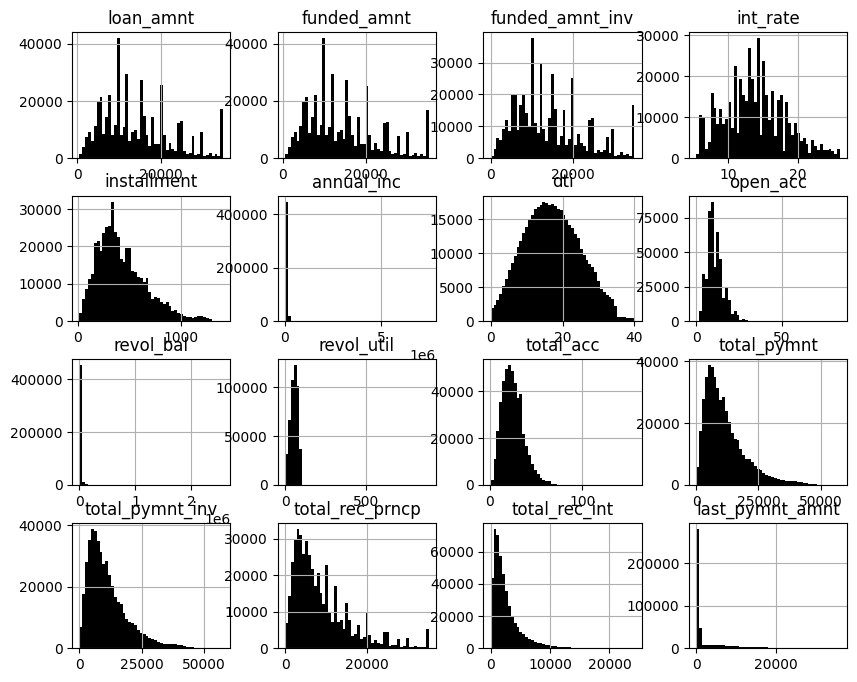

In [ ]:
df.hist(bins=50, figsize=(10,8), color='black')

In [ ]:
df1 = df.copy()

In [ ]:
df1.shape

(466285, 24)

In [ ]:
has_nan = df1.isna().any().any()
print("Apakah terdapat nilai NaN dalam data?:", has_nan)

# Jika ada NaN, hapus baris yang mengandung NaN dari salinan DataFrame
if has_nan:
    df1 = df1.dropna()
    print("Baris dengan nilai NaN telah dihapus dari df1.")

# Mengecek bentuk DataFrame setelah penghapusan
print("Bentuk DataFrame df1 setelah penghapusan baris dengan NaN:", df1.shape)

Apakah terdapat nilai NaN dalam data?: True
Baris dengan nilai NaN telah dihapus dari df1.
Bentuk DataFrame df1 setelah penghapusan baris dengan NaN: (444949, 24)


In [ ]:
#cek baris apakah ada Nan
rows_with_nan = df1.isna().any(axis=1).sum()
print(f"Ada {rows_with_nan} baris yang mengandung nilai NaN dalam data.")

Ada 0 baris yang mengandung nilai NaN dalam data.


In [ ]:
df1.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
dti                    0
earliest_cr_line       0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
dtype: int64

In [ ]:
# Menghitung jumlah nilai nol di setiap kolom
is_zero = df1.applymap(lambda x: x == 0)
zero_counts_per_column = is_zero.sum()
print("Jumlah nilai nol dalam setiap kolom:\n", zero_counts_per_column)

Jumlah nilai nol dalam setiap kolom:
 loan_amnt                 0
funded_amnt               0
funded_amnt_inv         224
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
dti                     317
earliest_cr_line          0
open_acc                  0
revol_bal              1904
revol_util             2183
total_acc                 0
total_pymnt              80
total_pymnt_inv         348
total_rec_prncp         370
total_rec_int           351
last_pymnt_amnt         357
dtype: int64


In [ ]:
nunique_counts = df1.nunique()
print(nunique_counts)

loan_amnt                1351
funded_amnt              1353
funded_amnt_inv          9718
term                        2
int_rate                  506
installment             54628
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              6
annual_inc              28414
verification_status         3
loan_status                 9
dti                      3997
earliest_cr_line          649
open_acc                   61
revol_bal               57679
revol_util               1265
total_acc                 112
total_pymnt            337639
total_pymnt_inv        334115
total_rec_prncp        164888
total_rec_int          262752
last_pymnt_amnt        192620
dtype: int64


# **ENCODING**

Merubah type data dari kategorikal menjadi numerical

ada 2 yang dilakukan
1. one-hot encoding untuk tipe data yang memang kategorinya bukan tingkatan.

2. LabelEncoder untuk tipe data yang kategorinya berupa tingkatan seperti grade dan sub-grade.

In [ ]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,27.65,Jan-85,3.0,13648,83.7,9.0,5861.071414,5831.78,5000.00,861.07,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,1.00,Apr-99,3.0,1687,9.4,4.0,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,8.72,Nov-01,2.0,2956,98.5,10.0,3003.653644,3003.65,2400.00,603.65,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,20.00,Feb-96,10.0,5598,21.0,37.0,12226.302210,12226.30,10000.00,2209.33,357.48
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,17.94,Jan-96,15.0,27783,53.9,38.0,3242.170000,3242.17,2233.10,1009.07,67.79


In [ ]:
# Membuat mapping urutan abjad untuk sub_grade dan grade
sub_grade_mapping = {sub_grade: idx for idx, sub_grade in enumerate(sorted(df1['sub_grade'].unique()))}
grade_mapping = {grade: idx for idx, grade in enumerate(sorted(df1['grade'].unique()))}

# Melakukan Label Encoding dengan urutan abjad
df1['sub_grade_encoded'] = df1['sub_grade'].map(sub_grade_mapping)
df1['grade_encoded'] = df1['grade'].map(grade_mapping)

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Label encoding untuk kolom sub_grade dan grade
df1['sub_grade_encoded'] = label_encoder.fit_transform(df1['sub_grade'])
df1['grade_encoded'] = label_encoder.fit_transform(df1['grade'])

# Menjatuhkan kolom asli
df1.drop(columns=['sub_grade', 'grade'], inplace=True)

In [ ]:
# Lakukan one-hot encoding pada kolom kategorikal
df1 = pd.get_dummies(df1, columns=['home_ownership', 'verification_status'], dtype=int)


In [ ]:
#term mengambil numericnya "36 months"
df1['term_numeric'] = df1['term'].str.extract(r'(\d+)', expand=False).astype(int)
df1.drop(columns=['term'], inplace=True)

In [ ]:
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
# Fungsi untuk mengonversi emp_length ke numerik
def convert_emp_length(emp_length):
    if emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    else:
        return int(emp_length.split()[0])

# Terapkan fungsi ke kolom emp_length
df1['emp_length_numeric'] = df1['emp_length'].apply(convert_emp_length)

# Drop kolom emp_length yang asli jika tidak lagi diperlukan
df1.drop(columns=['emp_length'], inplace=True)


In [ ]:
# Mengonversi kolom 'earliest_cr_line' menjadi format datetime
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format='%b-%y')

# Mengambil tahun dari kolom 'earliest_cr_line_date'
df1['earliest_cr_line_year'] = df1['earliest_cr_line'].dt.year.astype(int)

# Drop kolom 'earliest_cr_line_date' jika tidak lagi diperlukan
df1.drop(columns=['earliest_cr_line'], inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444949 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            444949 non-null  int64  
 1   funded_amnt                          444949 non-null  int64  
 2   funded_amnt_inv                      444949 non-null  float64
 3   int_rate                             444949 non-null  float64
 4   installment                          444949 non-null  float64
 5   annual_inc                           444949 non-null  float64
 6   loan_status                          444949 non-null  object 
 7   dti                                  444949 non-null  float64
 8   open_acc                             444949 non-null  float64
 9   revol_bal                            444949 non-null  int64  
 10  revol_util                           444949 non-null  float64
 11  total_acc         

In [ ]:
df2 = df1.copy()

In [ ]:
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,sub_grade_encoded,grade_encoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_numeric,emp_length_numeric,earliest_cr_line_year
0,5000,5000,4975.0,10.65,162.87,24000.0,Fully Paid,27.65,3.0,13648,83.7,9.0,5861.071414,5831.78,5000.00,861.07,171.62,6,1,0,0,0,0,0,1,0,0,1,36,10,1985
1,2500,2500,2500.0,15.27,59.83,30000.0,Charged Off,1.00,3.0,1687,9.4,4.0,1008.710000,1008.71,456.46,435.17,119.66,13,2,0,0,0,0,0,1,0,1,0,60,0,1999
2,2400,2400,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,2.0,2956,98.5,10.0,3003.653644,3003.65,2400.00,603.65,649.91,14,2,0,0,0,0,0,1,1,0,0,36,10,2001
3,10000,10000,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,10.0,5598,21.0,37.0,12226.302210,12226.30,10000.00,2209.33,357.48,10,2,0,0,0,0,0,1,0,1,0,36,10,1996
4,3000,3000,3000.0,12.69,67.79,80000.0,Current,17.94,15.0,27783,53.9,38.0,3242.170000,3242.17,2233.10,1009.07,67.79,9,1,0,0,0,0,0,1,0,1,0,60,1,1996


In [ ]:
df1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
# Label map untuk mengklasifikasikan status pembayaran menjadi "bad" atau "good"
label_map = {
    'Fully Paid': 'good',
    'Charged Off': 'bad',
    'Current': 'good',
    'Default': 'bad',
    'Late (31-120 days)': 'bad',
    'In Grace Period': 'good',  # Dapat juga dianggap sebagai "bad" tergantung pada kebijakan pemberi pinjaman
    'Late (16-30 days)': 'bad',
    'Does not meet the credit policy. Status:Fully Paid': 'good',
    'Does not meet the credit policy. Status:Charged Off': 'bad'
}
# Menggunakan label map untuk mengonversi status pembayaran menjadi kategori "bad" atau "good"
df2['loan_status'] = df2['loan_status'].map(label_map)

In [ ]:
df2['loan_status'] = df2['loan_status'].map({
    'bad':0,
    'good':1,
})

#SUDAH NUMERIC SEMUA

In [ ]:
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,sub_grade_encoded,grade_encoded,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_numeric,emp_length_numeric,earliest_cr_line_year
0,5000,5000,4975.0,10.65,162.87,24000.0,1,27.65,3.0,13648,83.7,9.0,5861.071414,5831.78,5000.00,861.07,171.62,6,1,0,0,0,0,0,1,0,0,1,36,10,1985
1,2500,2500,2500.0,15.27,59.83,30000.0,0,1.00,3.0,1687,9.4,4.0,1008.710000,1008.71,456.46,435.17,119.66,13,2,0,0,0,0,0,1,0,1,0,60,0,1999
2,2400,2400,2400.0,15.96,84.33,12252.0,1,8.72,2.0,2956,98.5,10.0,3003.653644,3003.65,2400.00,603.65,649.91,14,2,0,0,0,0,0,1,1,0,0,36,10,2001
3,10000,10000,10000.0,13.49,339.31,49200.0,1,20.00,10.0,5598,21.0,37.0,12226.302210,12226.30,10000.00,2209.33,357.48,10,2,0,0,0,0,0,1,0,1,0,36,10,1996
4,3000,3000,3000.0,12.69,67.79,80000.0,1,17.94,15.0,27783,53.9,38.0,3242.170000,3242.17,2233.10,1009.07,67.79,9,1,0,0,0,0,0,1,0,1,0,60,1,1996


In [ ]:
df2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'sub_grade_encoded', 'grade_encoded',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_numeric', 'emp_length_numeric', 'earliest_cr_line_year'],
      dtype='object')

In [ ]:
col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'sub_grade_encoded', 'grade_encoded',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'term_numeric', 'emp_length_numeric', 'earliest_cr_line_year']

for col in df2:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Mengecek hasil konversi
print(df2.dtypes)

loan_amnt                                int64
funded_amnt                              int64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
open_acc                               float64
revol_bal                                int64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
last_pymnt_amnt                        float64
sub_grade_encoded                        int64
grade_encoded                            int64
home_ownership_ANY                       int64
home_ownership_MORTGAGE                  int64
home_ownershi

In [ ]:
STOP

NameError: name 'STOP' is not defined

# Handling Outliers

<ipython-input-37-04211296b207>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


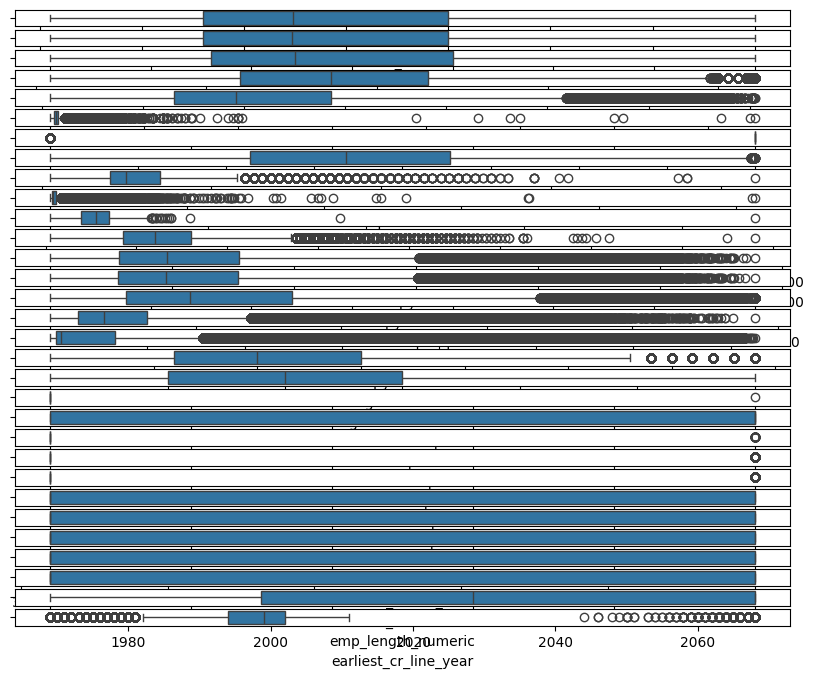

In [ ]:
# Plotting boxplots
plt.figure(figsize=(10, 8))

# Iterate over each column and create a horizontal boxplot
for i, column in enumerate(df2.columns):
    plt.subplot(len(df2.columns), 1, i+1)
    sns.boxplot(x=df2[column])

plt.tight_layout()
plt.show()

**Winsorizing data**

Winsorizing adalah teknik penting dalam pengolahan data untuk menangani outliers tanpa harus menghapus data

In [ ]:
# Winsorizing data
from scipy.stats.mstats import winsorize
numeric_features = df2.select_dtypes(include=['float64', 'int64']).columns

# Terapkan winsorizing pada setiap kolom numerik
for feature in numeric_features:
    df2[feature] = winsorize(df2[feature], limits=[0.05, 0.05])

<ipython-input-39-04211296b207>:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


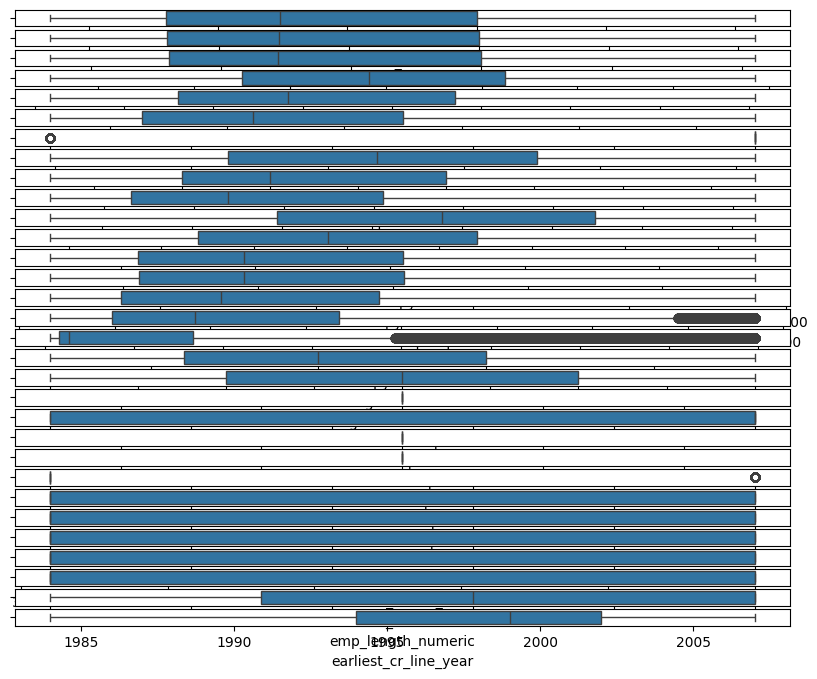

In [ ]:
# Plotting boxplots
plt.figure(figsize=(10, 8))

# Iterate over each column and create a horizontal boxplot
for i, column in enumerate(df2.columns):
    plt.subplot(len(df2.columns), 1, i+1)
    sns.boxplot(x=df2[column])

plt.tight_layout()
plt.show()

korelasi feature dengan target ['loan_status']

In [ ]:
df2.corr()['loan_status']

loan_amnt                             -0.016366
funded_amnt                           -0.015565
funded_amnt_inv                       -0.011999
int_rate                              -0.176054
installment                           -0.018371
annual_inc                             0.066445
loan_status                            1.000000
dti                                   -0.050188
open_acc                               0.002715
revol_bal                              0.021048
revol_util                            -0.051322
total_acc                              0.021530
total_pymnt                            0.199372
total_pymnt_inv                        0.200148
total_rec_prncp                        0.263234
total_rec_int                          0.021008
last_pymnt_amnt                        0.186404
sub_grade_encoded                     -0.171815
grade_encoded                         -0.166997
home_ownership_ANY                          NaN
home_ownership_MORTGAGE                0

In [ ]:
df2['loan_status'].value_counts()

loan_status
1    395673
0     49276
Name: count, dtype: int64

**SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE membuat contoh sintetis baru. Ini dilakukan dengan memilih contoh dari kelas minoritas dan kemudian membuat contoh baru yang terletak di antara contoh tersebut dan tetangga terdekatnya. Contoh sintetis dibuat dengan interpolasi antara titik data kelas minoritas yang ada.

<Axes: xlabel='loan_status', ylabel='count'>

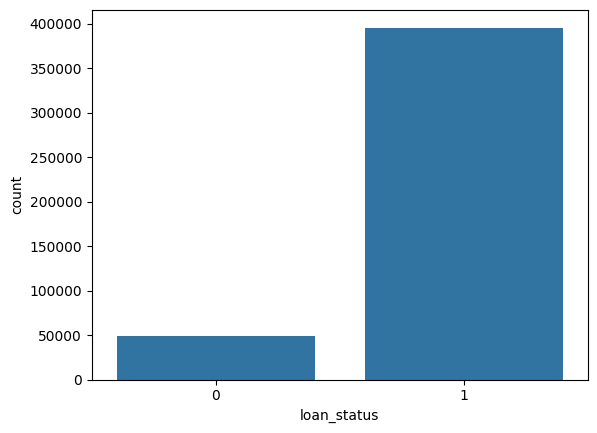

In [ ]:
sns.countplot(x='loan_status', data = df2)

In [ ]:
df3 = df2.copy()

In [ ]:
x = df3.drop(columns=['loan_status'])
y = df3['loan_status']

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_res, y_res = sm.fit_resample(x, y)

<Axes: xlabel='loan_status', ylabel='count'>

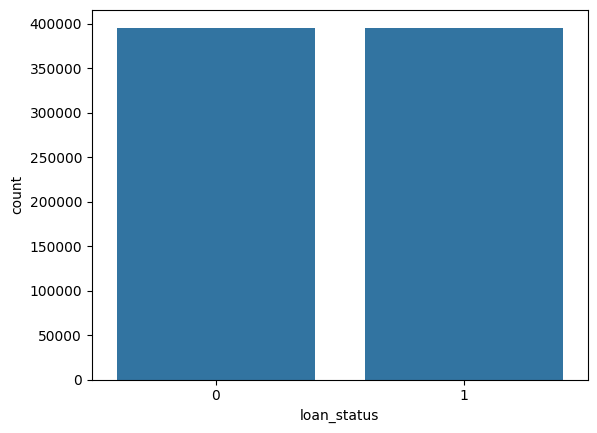

In [ ]:
sns.countplot(x=y_res)

# MODELING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.15, stratify=y_res)

In [ ]:
#normalisasi
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
import pandas as pd #dataframe
import seaborn as sns #visualisasi
import matplotlib.pyplot as plt #visualisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder #encoding
from scipy import stats
from sklearn.impute import KNNImputer #imputasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
gnb = GaussianNB()

In [ ]:
dtree.fit(x_train,y_train)
rfc.fit(x_train,y_train)
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
abc.fit(x_train, y_train)
gnb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

# Membuat prediksi untuk setiap model
y_pred_dtree = dtree.predict(x_test)
y_pred_rfc = rfc.predict(x_test)
y_pred_lr = lr.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_abc = abc.predict(x_test)
y_pred_gnb = gnb.predict(x_test)

# Menghitung akurasi untuk setiap model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_abc = accuracy_score(y_test, y_pred_abc)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Menampilkan akurasi
print("Decision Tree Classifier Accuracy:", accuracy_dtree)
print("Random Forest Classifier Accuracy:", accuracy_rfc)
print("Logistic Regression Accuracy:", accuracy_lr)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_knn)
print("AdaBoost Classifier Accuracy:", accuracy_abc)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb)


Decision Tree Classifier Accuracy: 0.944280635541103
Random Forest Classifier Accuracy: 0.970986167040151
Logistic Regression Accuracy: 0.7858165827029031
K-Nearest Neighbors Classifier Accuracy: 0.9191673265825344
AdaBoost Classifier Accuracy: 0.9105154083334738
Gaussian Naive Bayes Accuracy: 0.7149247695910769


1. Random Forest Classifier menunjukkan kinerja terbaik dengan akurasi 0.9724. Ini diharapkan karena Random Forest menggabungkan banyak pohon keputusan dan secara efektif mengurangi overfitting serta menangani variabilitas dalam data.

2. Decision Tree Classifier juga menunjukkan kinerja yang baik dengan akurasi 0.9445, namun mungkin lebih rentan terhadap overfitting dibandingkan Random Forest.

3. Logistic Regression memiliki akurasi yang lebih rendah, yang mungkin menunjukkan bahwa hubungan dalam data tidak sepenuhnya linier.

4. KNN dan AdaBoost menunjukkan kinerja yang cukup baik, masing-masing dengan akurasi 0.9197 dan 0.9116. Ini menunjukkan bahwa kedua metode tersebut juga mampu menangkap pola dalam data dengan cukup baik.

5. Gaussian Naive Bayes memiliki kinerja terendah, yang mungkin disebabkan oleh asumsi independensi yang kuat antar fitur.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
# Evaluate Decision Tree Classifier
print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Precision:", precision_score(y_test, y_pred_dtree))
print("Recall:", recall_score(y_test, y_pred_dtree))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

# Evaluate Logistic Regression
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Evaluate K-Nearest Neighbors Classifier
print("\nK-Nearest Neighbors Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Evaluate AdaBoost Classifier
print("\nAdaBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_abc))
print("Precision:", precision_score(y_test, y_pred_abc))
print("Recall:", recall_score(y_test, y_pred_abc))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_abc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_abc))
print("Classification Report:\n", classification_report(y_test, y_pred_abc))

# Evaluate Gaussian Naive Bayes
print("\nGaussian Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Recall:", recall_score(y_test, y_pred_gnb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

Decision Tree Classifier
Accuracy: 0.944280635541103
Precision: 0.9470373823853522
Recall: 0.9411972839547775
ROC-AUC: 0.9442806355411029
Confusion Matrix:
 [[56227  3124]
 [ 3490 55861]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     59351
           1       0.95      0.94      0.94     59351

    accuracy                           0.94    118702
   macro avg       0.94      0.94      0.94    118702
weighted avg       0.94      0.94      0.94    118702


Random Forest Classifier
Accuracy: 0.970986167040151
Precision: 0.9529009575347127
Recall: 0.990952132230291
ROC-AUC: 0.9709861670401508
Confusion Matrix:
 [[56444  2907]
 [  537 58814]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     59351
           1       0.95      0.99      0.97     59351

    accuracy                           0.97    118702
   macro avg       0.97      0.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Inisialisasi K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation untuk Random Forest Classifier
cv_scores_rfc = cross_val_score(rfc, x, y, cv=kf, scoring='accuracy')

# Cross-Validation untuk Logistic Regression
cv_scores_lr = cross_val_score(lr, x, y, cv=kf, scoring='accuracy')

# Cetak hasil
print("Random Forest Classifier Cross-Validation Accuracy: ", cv_scores_rfc)
print("Mean Accuracy: ", cv_scores_rfc.mean())
print("Logistic Regression Cross-Validation Accuracy: ", cv_scores_lr)
print("Mean Accuracy: ", cv_scores_lr.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Random Forest Classifier Cross-Validation Accuracy:  [0.95369143 0.95424205 0.95307338 0.95338802 0.95339873]
Mean Accuracy:  0.9535587221007635
Logistic Regression Cross-Validation Accuracy:  [0.91411395 0.91602427 0.91673222 0.91288909 0.91398937]
Mean Accuracy:  0.9147497786029204


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


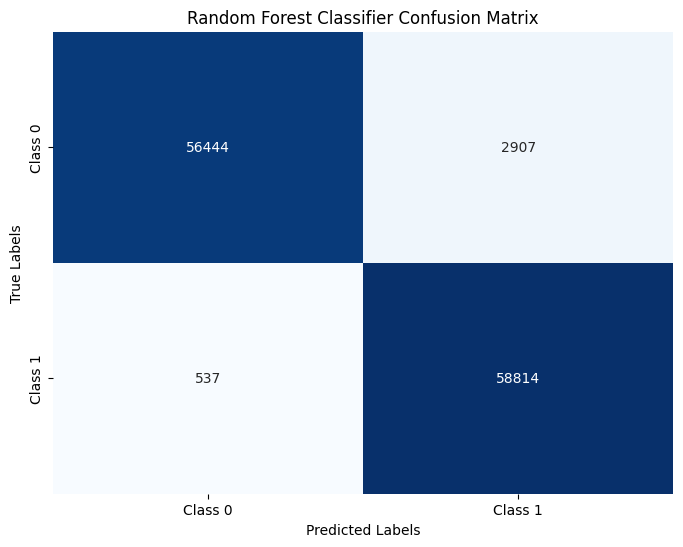

In [ ]:
# Fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


plot_confusion_matrix(y_test, y_pred_rfc, "Random Forest Classifier Confusion Matrix")



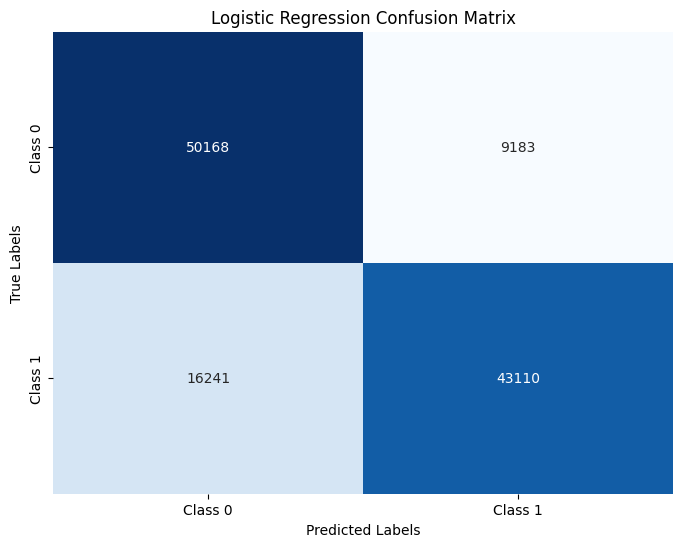

In [ ]:
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")